In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
import os
from config import imshape, n_classes

from models import model_orig

In [2]:
model = model_orig()

Verifying training dataset
100%|██████████| 14000/14000 [00:38<00:00, 362.40it/s]
/Users/kacikus/.virtualenvs/automin_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Dataset verified! 
512/512 [==============================] - 538s 1s/step - loss: 9.3346 - accuracy: 0.1321
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 32) 896         input_1[0][0] 

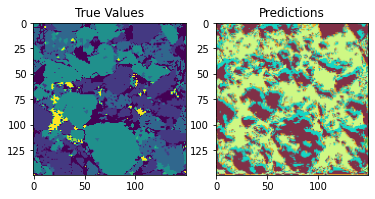

In [3]:
# self made model
i = 15210
# get prediction on test set
out = model.predict_segmentation(
    inp = f'../dataset/ppl_val_images/img_{i}.png',
    out_fname = 'Images/output.png')
# load the test image
pred_img = Image.open('Images/output.png').convert('RGB')
orig_img = Image.open(f'../dataset/val_segmentation/img_{i}.png')

# out = model.predict_segmentation(
#     inp = f'Images/image.jpg',
#     out_fname = 'Images/output.png')
# pred_img = Image.open('Images/output.png').convert('RGB')
# #load original image
# orig_img = Image.open(f'Images/image.jpg')

plt.subplot(1,2,1)
plt.title('True Values')
plt.imshow(orig_img)

plt.subplot(1,2,2)
plt.title('Predictions')
plt.imshow(pred_img)

# Observations from outputs
I have found that training on only xpl data results in generally more identifiable shapes, whereas training on ppl data results in fuzzier, noisier predictions


/Users/kacikus/.virtualenvs/automin_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


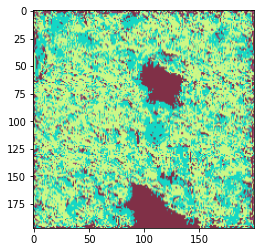

In [9]:
plt.imshow(pred_img)
unique, counts = np.unique(np.array(pred_img),axis=1, return_counts=True)

frequencies = np.asarray((unique, counts))



In [10]:
print(frequencies)

[array([[[ 20, 215, 197],
         [ 21, 214, 196],
         [ 21, 214, 196],
         ...,
         [207, 248, 132],
         [207, 248, 132],
         [207, 248, 132]],

        [[ 23, 212, 195],
         [128,  48,  71],
         [128,  48,  71],
         ...,
         [207, 248, 132],
         [207, 248, 132],
         [207, 248, 132]],

        [[143,  70, 109],
         [124,  54,  76],
         [128,  48,  71],
         ...,
         [205, 241, 131],
         [205, 241, 131],
         [207, 248, 132]],

        ...,

        [[128,  48,  71],
         [207, 248, 132],
         [207, 248, 132],
         ...,
         [128,  48,  71],
         [207, 248, 132],
         [128,  48,  71]],

        [[128,  48,  71],
         [207, 248, 132],
         [207, 248, 132],
         ...,
         [128,  48,  71],
         [130,  53,  72],
         [128,  48,  71]],

        [[128,  48,  71],
         [ 21, 215, 197],
         [ 21, 215, 197],
         ...,
         [144,  71, 111],
        